In [1]:
# KNN implementation 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter




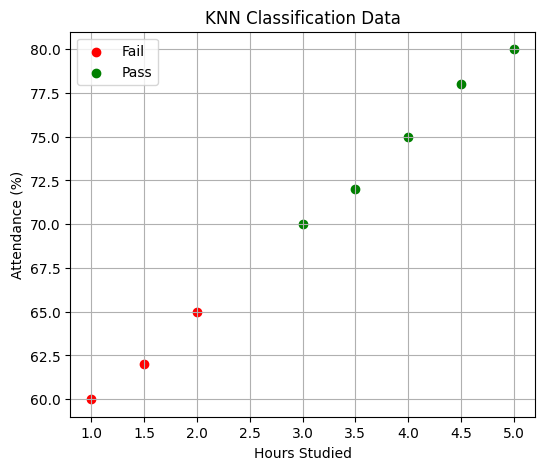

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# === Dataset ===
X = np.array([
    [1, 60],
    [2, 65],
    [3, 70],
    [4, 75],
    [5, 80],
    [1.5, 62],
    [3.5, 72],
    [4.5, 78]
])
y = np.array([0, 0, 1, 1, 1, 0, 1, 1])  # 1 = Pass, 0 = Fail

# Plotting
plt.figure(figsize=(6,5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Fail')
plt.scatter(X[y==1, 0], X[y==1, 1], color='green', label='Pass')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance (%)')
plt.title('KNN Classification Data')
plt.legend()
plt.grid(True)
plt.show()


Testing on held-out points:
Test Student 1: [ 3.5 72. ] → Predicted: Pass, Actual: Pass
Test Student 2: [ 4.5 78. ] → Predicted: Pass, Actual: Pass

Predictions for new students:
New Student 1: (2.5 hrs, 68.0%) → Fail
New Student 2: (0.5 hrs, 55.0%) → Fail


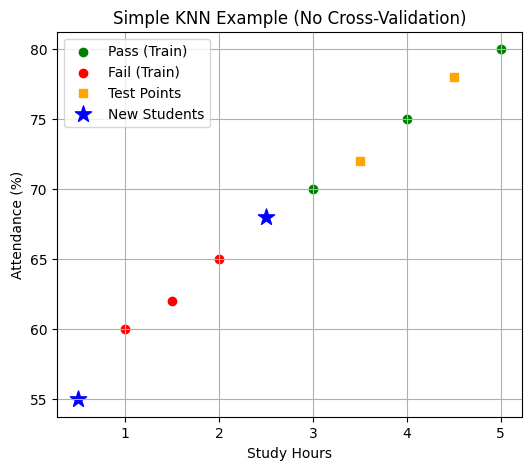

In [16]:

# === Step 1: Euclidean distance ===
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# === Step 2: Simple KNN prediction (majority vote) ===
def knn_predict(X_train, y_train, x_query, k=3):
    # Calculate distances from query to all training points
    distances = [euclidean_distance(x_query, x_t) for x_t in X_train]
    # Find indices of k nearest neighbors
    k_nearest = np.argsort(distances)[:k]
    # Get their labels
    k_labels = y_train[k_nearest]
    # Return the most common label (majority vote)
    return Counter(k_labels).most_common(1)[0][0]

# === Step 3: Split data manually ===
# Use first 6 students for training, last 2 for testing
X_train = X[:6]
y_train = y[:6]
X_test = X[6:]
y_test = y[6:]

# === Step 4: Test KNN ===
k = 3
print("Testing on held-out points:")
for i, x in enumerate(X_test):
    pred = knn_predict(X_train, y_train, x, k)
    print(f"Test Student {i+1}: {x} → Predicted: {'Pass' if pred==1 else 'Fail'}, Actual: {'Pass' if y_test[i]==1 else 'Fail'}")

# === Step 5: Predict for new students ===
new_students = np.array([[2.5, 68], [0.5, 55]])
print("\nPredictions for new students:")
for i, x in enumerate(new_students):
    pred = knn_predict(X_train, y_train, x, k)
    print(f"New Student {i+1}: ({x[0]} hrs, {x[1]}%) → {'Pass' if pred==1 else 'Fail'}")

# === Step 6: Visualize ===
plt.figure(figsize=(6,5))
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='green', label='Pass (Train)')
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='red', label='Fail (Train)')
plt.scatter(X_test[:,0], X_test[:,1], color='orange', marker='s', label='Test Points')
plt.scatter(new_students[:,0], new_students[:,1], color='blue', marker='*', s=150, label='New Students')
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("Simple KNN Example (No Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()


# KNN Regression


Predicted price for house of size 1000 sqft (k=3): 17.33 lacs
Predicted price for house of size 1400 sqft (k=3): 24.33 lacs


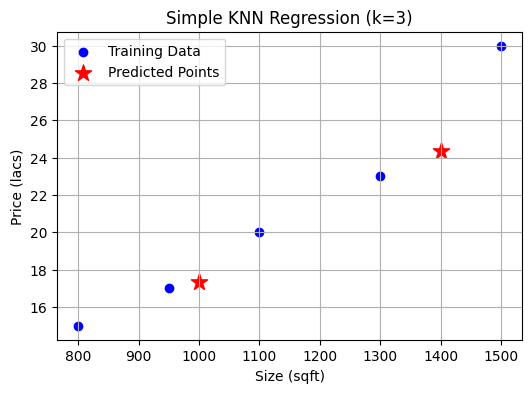

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# === Step 1: Dataset ===
X = np.array([800, 950, 1100, 1300, 1500])
y = np.array([15.0, 17.0, 20.0, 23.0, 30.0])

# === Step 2: Euclidean distance (1D here, so it's just absolute difference) ===
def distance(a, b):
    return abs(a - b)

# === Step 3: KNN Regression function ===
def knn_regression(X_train, y_train, x_query, k=3):
    # Compute distances from query to all training points
    distances = [distance(x_query, x) for x in X_train]
    # Get indices of k nearest points
    k_idx = np.argsort(distances)[:k]
    # Get their target prices
    k_prices = y_train[k_idx]
    # Predict = average of neighbors' prices
    prediction = np.mean(k_prices)
    return prediction

# === Step 4: Predict prices for new houses ===
new_sizes = np.array([1000, 1400])
k = 3
for size in new_sizes:
    pred_price = knn_regression(X, y, size, k)
    print(f"Predicted price for house of size {size} sqft (k={k}): {pred_price:.2f} lacs")

# === Step 5: Visualization ===
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(new_sizes, [knn_regression(X, y, s, k) for s in new_sizes],
            color='red', marker='*', s=150, label='Predicted Points')
plt.xlabel("Size (sqft)")
plt.ylabel("Price (lacs)")
plt.title(f"Simple KNN Regression (k={k})")
plt.legend()
plt.grid(True)
plt.show()
